<a href="https://colab.research.google.com/github/Sans2326/CUREYA_TASKS/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC SURVIVAL PROJECT**

IMPORTING LIBRARIES

In [457]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [458]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing dataset

In [459]:
data = pd.read_csv('/content/gdrive/MyDrive/csv file/gender_submission.csv')
train_data = pd.read_csv('/content/gdrive/MyDrive/csv file/train.csv')
test_data = pd.read_csv('/content/gdrive/MyDrive/csv file/test.csv')

# Data Features:

* Survived: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

* Pclass: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

* Name: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

* Sex: Passenger's sex. It's either Male or Female.

* Age: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

* SibSp: Number of siblings or spouses travelling with each passenger.

* Parch: Number of parents of children travelling with each passenger.

* Ticket: Ticket number.

* Fare: How much money the passenger has paid for the travel journey.

* Cabin: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.

* Embarked: Port from where the particular passenger was embarked/boarded.

In [460]:
print("**********************DATASET********************")
print(data.head(3))
print("\n*********************TRAINING DATA****************")
print(train_data.head(3))
print("\n********************TESTING DATA*******************")
print(test_data.head(3))

**********************DATASET********************
   PassengerId  Survived
0          892         0
1          893         1
2          894         0

*********************TRAINING DATA****************
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S

[3 rows x 12 columns]

********************TESTING DATA*******************
   PassengerId  Pclass                              Name  ...    Fare  Cabin  Embarked
0          892       3                  Kelly, Mr. James  ...  7.8292    NaN         Q
1          893       3  Wilkes, Mrs. James (Ellen Needs)  ...  7.0000    NaN         S
2          894       2         Myles, Mr. Thomas Francis  ...  9.6875    NaN         Q

[3 rows x 11 columns]


In [461]:
print(train_data.columns)
print("\n\n")
print(test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')



Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [462]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [463]:
print(data.info())
print("\n")
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object





*   Age, Cabin, Embarked columns have missing values





In [464]:
#no of missing values in these coloumns
for i in ["Age","Embarked","Cabin"]:
  print(i, train_data[i].isnull().sum())

Age 177
Embarked 2
Cabin 687


In [465]:
#replacing missing age values
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)

In [466]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Finding relation between dataset features and survived

In [467]:
#percentage of passenger survived
survived = train_data[train_data['Survived']==1]
print("Out of {} passengers only {}% of people survived i.e {}".format(len(train_data), round(len(survived)/len(train_data)*100, ndigits=2), len(survived)))
#train_data['Survived'].value_counts(normalize=True)

Out of 891 passengers only 38.38% of people survived i.e 342


In [468]:
print("Percentage of male and female passengers\n",round(train_data['Sex'].value_counts(normalize = True)*100, 2))

Percentage of male and female passengers
 male      64.76
female    35.24
Name: Sex, dtype: float64


### Survival rate as per sex

Percentage survival of female: 74.2%
Percentage survival of male: 18.89%



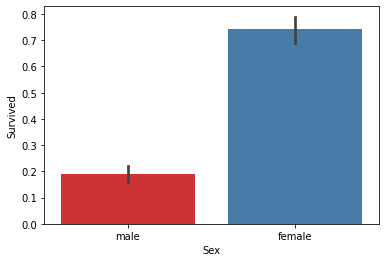

In [469]:
#survival rate by sex
fem = train_data[train_data["Sex"] == 'female']
male = train_data[train_data['Sex'] == 'male']

f = len(survived[survived['Sex'] == 'female'])
m = len(survived[survived['Sex'] == 'male'])
print("Percentage survival of female: {}%".format(round((f/len(fem)*100), 2)))
print("Percentage survival of male: {}%\n".format(round((m/len(male)*100), 2)))

sns.barplot(data = train_data, x="Sex", y="Survived", palette="Set1")

### Survival rate as per Pclass

In [470]:
pclass_surv = train_data.groupby('Pclass').Survived.value_counts()
pclass_surv.unstack('Pclass')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Survival percentage of class 1 passengers 62.96%
Survival percentage of class 2 passengers 47.28%
Survival percentage of class 3 passengers 24.24%


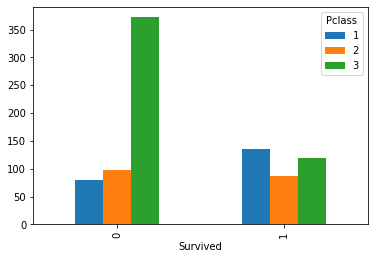

In [471]:
surv_1 = survived[survived['Pclass'] == 1]
surv_2 = survived[survived['Pclass'] == 2]
surv_3 = survived[survived['Pclass'] == 3]

tot_1 = train_data[train_data['Pclass'] == 1]
tot_2 = train_data[train_data['Pclass'] == 2]
tot_3 = train_data[train_data['Pclass'] == 3]

print("Survival percentage of class 1 passengers {}%".format(round((len(surv_1)/len(tot_1))*100, 2)))
print("Survival percentage of class 2 passengers {}%".format(round((len(surv_2)/len(tot_2))*100, 2)))
print("Survival percentage of class 3 passengers {}%".format(round((len(surv_3)/len(tot_3))*100, 2)))

pclass_surv.unstack('Pclass').plot(kind='bar')

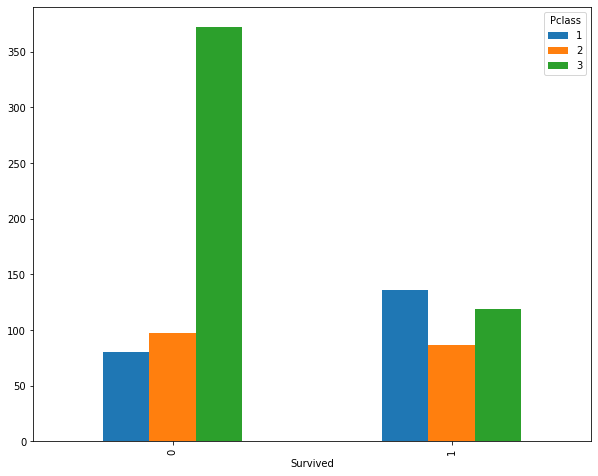

In [472]:
pclass_surv.unstack("Pclass").plot(kind='bar', figsize=(10,8))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


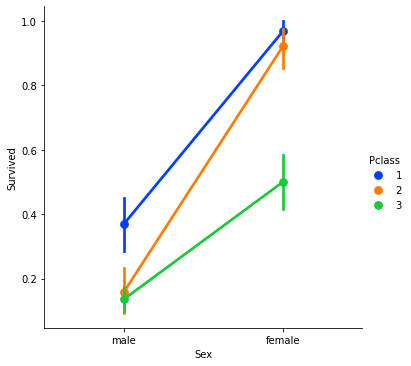

In [473]:
#pclass & sex vs survived
sns.factorplot(data=train_data, x='Sex', y='Survived', hue='Pclass', palette='bright')


* Passengers staying in Pclass 3 have the least survival rate
* Female have better survival chance
* Female of Pclass 1 and 2 have almost 100% survival chances

In [474]:
corr = train_data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038062,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.011497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.360547,0.083081,0.018443,-0.549500
Age,0.038062,0.011497,-0.360547,1.000000,-0.183470,-0.047017,0.135617
SibSp,-0.057527,-0.035322,0.083081,-0.183470,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.047017,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.135617,0.159651,0.216225,1.000000


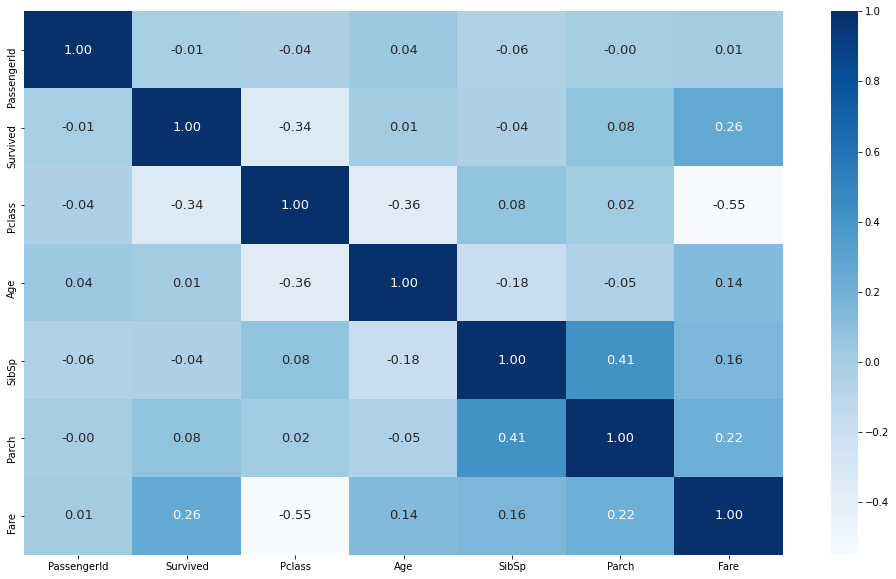

In [475]:
plt.figure(figsize=(17,10))
sns.heatmap(corr, annot= True, fmt='.2f', annot_kws={'size':13}, cmap='Blues')

### Survival rate as per Family(SibSp and Parch)

In [476]:
#survival count of passenger as per Sibling Spouse count
train_data.groupby('SibSp').Survived.value_counts().unstack()

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


In [477]:
#survival count of passenger as per no of parent and children
train_data.groupby('Parch').Survived.value_counts().unstack()

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


In [478]:
tots_0 = train_data[train_data['SibSp']==0]
tots_1 = train_data[train_data['SibSp']==1]
sib_0 = survived[survived['SibSp']==0]
sib_1 = survived[survived['SibSp']==1]
print("survival percentage with 0 sibling and spouse: {}%".format(round((len(sib_0)/len(tots_0))*100, 2)))
print("survival percentage with 1 sibling and spouse: {}%".format(round((len(sib_1)/len(tots_1))*100, 2)))

survival percentage with 0 sibling and spouse: 34.54%
survival percentage with 1 sibling and spouse: 53.59%


In [479]:
totp_0 = train_data[train_data['Parch']==0]
totp_1 = train_data[train_data['Parch']==1]
parch_0 = survived[survived['Parch']==0]
parch_1 = survived[survived['Parch']==1]
print("survival percentage with 0 sibling and spouse: {}%".format(round((len(parch_0)/len(totp_0))*100, 2)))
print("survival percentage with 1 sibling and spouse: {}%".format(round((len(parch_1)/len(totp_1))*100, 2)))

survival percentage with 0 sibling and spouse: 34.37%
survival percentage with 1 sibling and spouse: 55.08%


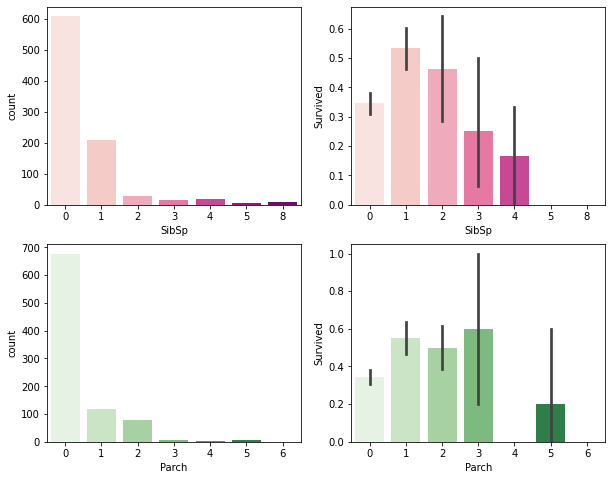

In [480]:
fig, axes = plt.subplots(2,2, figsize=(10,8))
sns.barplot(data=train_data, x='SibSp', y='Survived', palette='RdPu', ax=axes[0][1])
sns.countplot(data=train_data, x='SibSp', palette='RdPu', ax=axes[0][0])

sns.barplot(data=train_data, x='Parch', y='Survived', palette='Greens', ax=axes[1][1])
sns.countplot(data=train_data, x='Parch', palette='Greens', ax=axes[1][0])

* Maximum no of passenger were travelling alone
* Passengers with only 1 sibling/spouse count have higher survival chance

### Survival rate as per Age

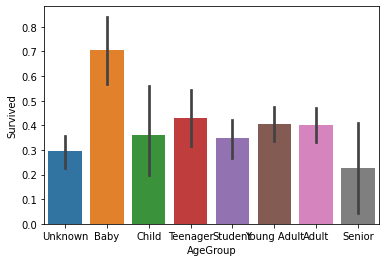

In [481]:
#sort the ages into logical categories
bins = [-1, 0, 5, 12, 18, 24, 35, 60, 100]     #from corr we know that max age is 80
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data["Age"], bins, labels = labels)
test_data['AgeGroup'] = pd.cut(test_data["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train_data)
plt.show()

### Survival rate as per cabin number

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


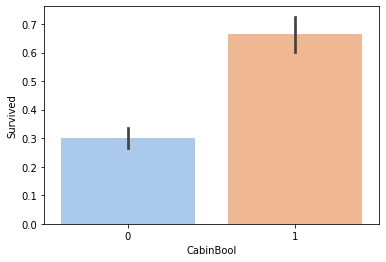

In [482]:
train_data["CabinBool"] = (train_data["Cabin"].notnull().astype('int'))
test_data["CabinBool"] = (test_data["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train_data["Survived"][train_data["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train_data["Survived"][train_data["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train_data, palette='pastel')
plt.show()

In [483]:
# we will drop cabin, name and ticket feature as it doen't yields any useful info
train_data = train_data.drop(['Cabin'], axis = 1)

In [484]:
test_data = test_data.drop(['Cabin'], axis = 1)

In [485]:
train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)

In [486]:
#train_data = train_data.drop(['Name'], axis = 1)
#test_data = test_data.drop(['Name'], axis = 1)

### Survivalrate as per Embarked

In [487]:
train_data.groupby('Embarked').Survived.value_counts().unstack()

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [488]:
#replacing missing feature in embarked with S
train_data['Embarked'] = train_data['Embarked'].fillna('S')

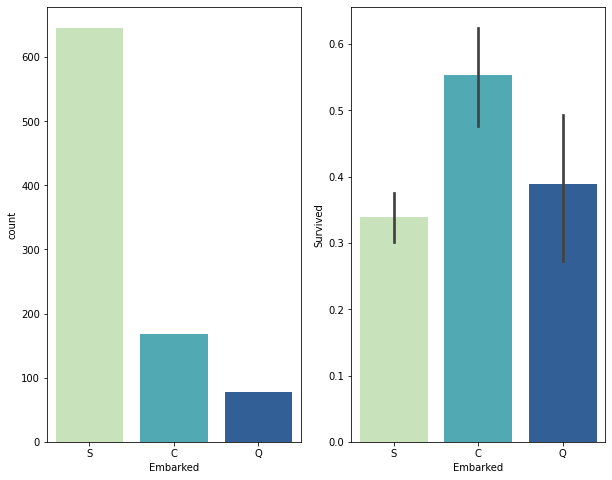

In [489]:
fx, axes = plt.subplots(1, 2, figsize=(10,8))
sns.countplot(x=train_data['Embarked'], ax=axes[0], palette='YlGnBu')
sns.barplot(x=train_data['Embarked'], y=train_data['Survived'], ax=axes[1], palette='YlGnBu')

### Replacing and Dropping feature where needed

In [490]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0


In [491]:
 # combining train and test dataset
combo = [train_data, test_data]

# extracting titles from Name column.
for dataset in combo:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [492]:
#replacing titles
for dataset in combo:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Royal,0.347826


Text(0, 0.5, 'Survived')

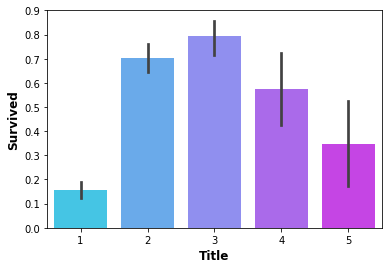

In [566]:
sns.barplot(data=train_data, x='Title', y='Survived', palette='cool')
plt.xlabel('Title', fontweight ='bold', fontsize = 12)
plt.ylabel('Survived', fontweight ='bold', fontsize = 12)

In [494]:
#map each of the title groups to a numerical value
title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combo:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [495]:
# age mapping
age_map = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
for dataset in combo:
    dataset['AgeGroup'] = dataset['AgeGroup'].map(age_map)
    dataset['AgeGroup'] = dataset['AgeGroup'].fillna(0)

#dropping the Age feature for now, might change
train_data = train_data.drop(['Age'], axis = 1)
test_data = test_data.drop(['Age'], axis = 1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,0,1


In [496]:
#drop the name feature since it contains no more useful information.
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

In [497]:
#map each Sex value to a numerical value
sex_map = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_map)
test_data['Sex'] = test_data['Sex'].map(sex_map)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [498]:
#map each Embarked value to a numerical value
embark_map = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embark_map)
test_data['Embarked'] = test_data['Embarked'].map(embark_map)

train_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


# Prediction

In [499]:
#splitting dataset
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
Y = train_data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [500]:
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,3,0,1,0,7.2500,1,4.0,0,1
1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,0,0,7.9250,1,5.0,0,2
3,1,1,1,0,53.1000,1,5.0,1,3
4,3,0,0,0,8.0500,1,5.0,0,1


### Logistic Regression

In [525]:
clf1 = LogisticRegression()
clf1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [526]:
y_pred = clf1.predict(x_test)
train_pred = clf1.predict(x_train)
acc_lgr = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_lgrt = round(accuracy_score(train_pred, y_train) * 100, 2)
accuracies = []
accuracies.append(acc_lgr)
print("Testing data accuracy: ", acc_lgr)
print("Training data accuracy: ",acc_lgrt)

Testing data accuracy:  81.56
Training data accuracy:  80.76


### SVM

In [527]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
train_pred = svc.predict(x_train)

In [528]:
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_svct = round(accuracy_score(train_pred, y_train) * 100, 2)
accuracies.append(acc_svc)
print("Testing data accuracy: ", acc_svc)
print("Training data accuracy: ",acc_svct)

Testing data accuracy:  64.25
Training data accuracy:  67.7


### Random Forest

In [529]:
# Random Forest
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [530]:
y_pred = rf.predict(x_test)
train_pred = rf.predict(x_train)
acc_rf = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_rft = round(accuracy_score(train_pred, y_train) * 100, 2)
accuracies.append(acc_rf)
print("Testing data accuracy: ", acc_rf)
print("Training data accuracy: ",acc_rft)

Testing data accuracy:  81.56
Training data accuracy:  96.63


### XGBoost

In [531]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [532]:
y_pred = xgb.predict(x_test)
train_pred = xgb.predict(x_train)
acc_xgb = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_xgbt = round(accuracy_score(train_pred, y_train) * 100, 2)
accuracies.append(acc_xgb)
print("Testing data accuracy: ", acc_xgb)
print("Training data accuracy: ",acc_xgbt)

Testing data accuracy:  83.8
Training data accuracy:  88.9


# CONCLUSION
XGBoost gives the best accuracy

In [533]:
accuracies

[81.56, 64.25, 81.56, 83.8]

In [537]:
labels = ['Logistic Regression', 'SVM','Random Forest', 'Xgboost']
df = pd.DataFrame(labels, accuracies)

Text(0, 0.5, 'Algorithm')

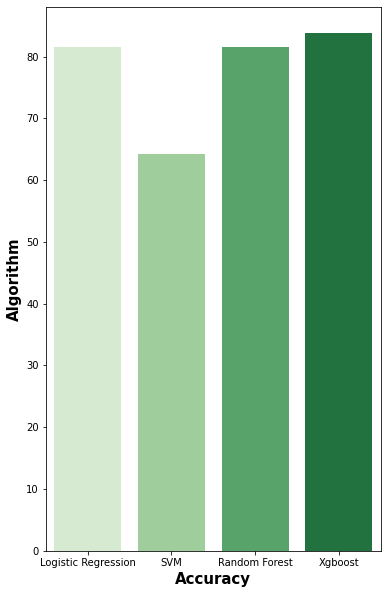

In [563]:
plt.figure(figsize=(6,10))
sns.barplot(data=df, x=labels, y=accuracies, palette='Greens')

plt.xlabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.ylabel('Algorithm', fontweight ='bold', fontsize = 15)